# Practical Work 4

- For this practical work, the trainees will develop a Python program that is able to implement the <b>Mini-Batch gradient descent</b> in order to achieve the linear regression (Single and Multivariables) of a set of datapoints.

##### Very Important notes:
- <font color='red'><b>Data should be shuffled for Mini-Batch GD to work fine.</b></font>
- <font color='red'><b>When you shuffle the data, input varibles and equivelant target label should be together. i.e. do not shuffle X and y separately or your data will be missed up.</b></font>
- <font color='red'><b>Save your losses and thetas for each iterations i.e. each mini-batch (not each epoch).</b></font>
- <font color='red'><b>Plot loss vs. iterations (not epochs). This will allow you to see the difference between mini-batch, SGD, and batch GD.</font>
- <font color='red'><b>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</b></font>

### Prerequisites:
- You should have seen <b>Day 1 and Day 2 as will as Day 3 Part 1 and Part 2</b> from our course <b><i>Master Numerical Optimization for Machine Learning and Deep Learning in 5 Days</b></i>.
- The course is available for free on our channel <b><i>Artificial Intelligence & Data Science شرح بالعربي</i></b>.
- Course link https://youtube.com/playlist?list=PLJM7jJIw2GC15hvIwN8sBXok__yLMcMxN&feature=shared

### Import numpy, matplotlib.pyplot

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
def plot_loss(Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(Losses,'-*',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()
    
def plot_loss_iter(Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.plot(Losses,'-*',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()
    
def plot_theta_loss(Th,Th_0_1,Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel(Th_0_1,fontsize=14,fontweight='bold')
    plt.ylabel('Loss',fontsize=14,fontweight='bold')
    plt.plot(Th,Losses,'-mo',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()

def calc_best_fit(Ths,Xin):
    y_best_fit= Xin @ Ths
    return y_best_fit

def plotReg(X,y,y_pred,Title):
    plt.figure(figsize =(10,8))
    plt.scatter(X,y)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.plot(X,y_pred,'r*-')
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()

### Read your multivariable LR data into X, y variables and make shure of dimensions.

In [3]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

X = data[:,0:3]
y = data[:,3]

print(f'X:\n {X}')

y = y.reshape(-1,1)
print(f'y:\n {y}')

X:
 [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
y:
 [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


### Step 1: Shuffle your data
- In this step we will also get the number of data points <b>(m)</b> and dimensions <b>n+1</b> .
- We will also add the column of ones <b>x0</b>
- Set random seed to 101.
- <b>Make sure the shuffled target label is a column vector</b>.

In [4]:
m = X.shape[0]
X_new = np.concatenate((np.ones((m,1)),X),axis=1)
n_1 = X_new.shape[1]

np.random.seed(101)
D = np.concatenate((X_new,y),axis=1)
print(f'Data before shuffle:\n {D}')

np.random.shuffle(D)
print(f'Data after shuffle:\n {D}')
X_sh = D[:,0:n_1]
y_sh = D[:,-1].reshape(-1,1)
print(f'X shuffled:\n {X_sh}')
print(f'y shuffled:\n {y_sh}')

Data before shuffle:
 [[  1.  73.  80.  75. 152.]
 [  1.  93.  88.  93. 185.]
 [  1.  89.  91.  90. 180.]
 [  1.  96.  98. 100. 196.]
 [  1.  73.  66.  70. 142.]
 [  1.  53.  46.  55. 101.]
 [  1.  69.  74.  77. 149.]
 [  1.  47.  56.  60. 115.]
 [  1.  87.  79.  90. 175.]
 [  1.  79.  70.  88. 164.]
 [  1.  69.  70.  73. 141.]
 [  1.  70.  65.  74. 141.]
 [  1.  93.  95.  91. 184.]
 [  1.  79.  80.  73. 152.]
 [  1.  70.  73.  78. 148.]
 [  1.  93.  89.  96. 192.]
 [  1.  78.  75.  68. 147.]
 [  1.  81.  90.  93. 183.]
 [  1.  88.  92.  86. 177.]
 [  1.  78.  83.  77. 159.]
 [  1.  82.  86.  90. 177.]
 [  1.  86.  82.  89. 175.]
 [  1.  78.  83.  85. 175.]
 [  1.  76.  83.  71. 149.]
 [  1.  96.  93.  95. 192.]]
Data after shuffle:
 [[  1.  78.  75.  68. 147.]
 [  1.  69.  70.  73. 141.]
 [  1.  78.  83.  85. 175.]
 [  1.  78.  83.  77. 159.]
 [  1.  47.  56.  60. 115.]
 [  1.  86.  82.  89. 175.]
 [  1.  89.  91.  90. 180.]
 [  1.  96.  98. 100. 196.]
 [  1.  93.  88.  93. 185.]
 [  

### Step 2: Parameters initialization (thetas = column vector of zeros, alpha = 0.00001)
- We will also define empty lists to save losses, thetas in all iterations.
- We will define the <b>mini-batch size</b> here we will use <b>mini-batch size = 4</b> .

In [5]:
alpha = 0.00001

thetas = np.zeros((n_1,1))

b = 4

thetas_all = []
loss = []
print(f'Intitial thetas:\n {thetas}')

Intitial thetas:
 [[0.]
 [0.]
 [0.]
 [0.]]


### Step 3: Claculate the prediction for the first mini-batch
#### You will need to slize the data and take the first (b = 4) points only according to the mini-batch size.

In [6]:
print(f'X min-batch = \n{X_sh[0:b]}\n')
print(f'y mini-batch = \n{y_sh[0:b]}')

X min-batch = 
[[ 1. 78. 75. 68.]
 [ 1. 69. 70. 73.]
 [ 1. 78. 83. 85.]
 [ 1. 78. 83. 77.]]

y mini-batch = 
[[147.]
 [141.]
 [175.]
 [159.]]


In [7]:
h= X_sh[0:b]@thetas
print(f'h(0) =\n {h}')

h(0) =
 [[0.]
 [0.]
 [0.]
 [0.]]


### Step 4: Clculate the error vector, cost, gradient as in Multivariable Bacth GD. However, here you will use the mini-batch data only.
#### Make sure in cost and gradient calculation you divide by batch size not the data size.

In [8]:
e = h-y_sh[0:b]
print(f'Error Vector min-batch:\n{e}\n')

Error Vector min-batch:
[[-147.]
 [-141.]
 [-175.]
 [-159.]]



In [9]:
j = np.linalg.norm(e)**2/(2*b)
print(f'j min-batch = {j}')

j min-batch = 12174.5


In [10]:
grad = X_sh[0:b].T@e/b
print(f'Gradient Vector:\n{grad}')

Gradient Vector:
[[  -155.5 ]
 [-11811.75]
 [-12154.25]
 [-11851.75]]


### Step 5: Update theta values

In [11]:
thetas =  thetas - alpha * grad  
print(f'New Thetas :\n{thetas}')

New Thetas :
[[0.001555 ]
 [0.1181175]
 [0.1215425]
 [0.1185175]]


### Step 6: Iterate through all mini-batches to finish the first epoch
#### Save thetas and loss each iteration  (minibatch) i.e. with each update.
#### Reinitialize parameters in the begining.
#### Plot the learning curves to explore parameters update in single epoch.
##### Note: According to the batch size, the last mini-batch should contain either the same data points as the previous mini-batches or more:
- Ex. if m = 25 and mini-batch size = 5 then we will have 5 mini-batches each contains 5 data points.
- Ex. if m = 25 and mini-batch size = 4 then we will have round(25/4) = 6 mini-batches each contains 4 data points except the last one will contain 5 data points.

In [12]:
alpha = 0.00001

thetas = np.zeros((n_1,1))
m = X.shape[0]
batch_size = 4
no_batches = m//batch_size


thetas_all = []
loss = []

for batch in range(no_batches):
    thetas_all.append(thetas)
    
    start = batch * batch_size
    end = (batch + 1) * batch_size
    if batch+1 != no_batches:
        X_batch = X_sh[start:end]
        y_batch = y_sh[start:end]
    else:
        X_batch = X_sh[start:]
        y_batch = y_sh[start:]
    
    h= X_batch@thetas
    
    e = h-y_batch
    
    j=np.linalg.norm(e)**2/(2*len(h))
    loss.append(j)
    
    grad = X_batch.T@e/len(h)
    
    
    thetas =  thetas - alpha * grad  

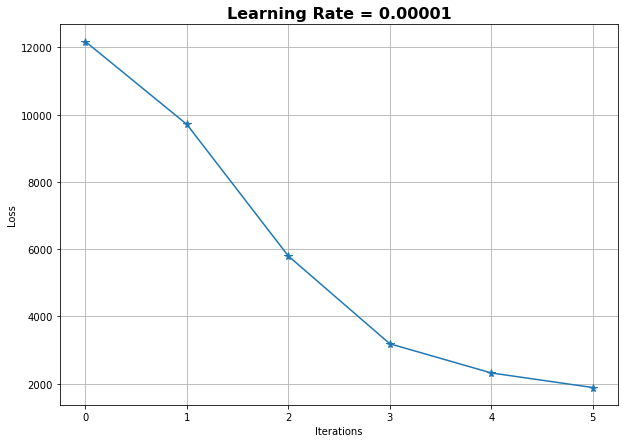

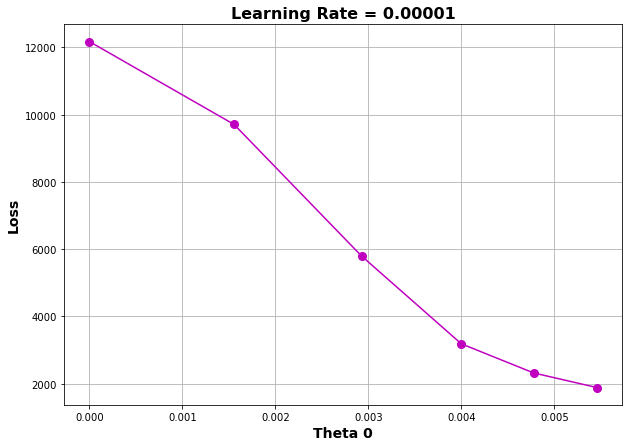

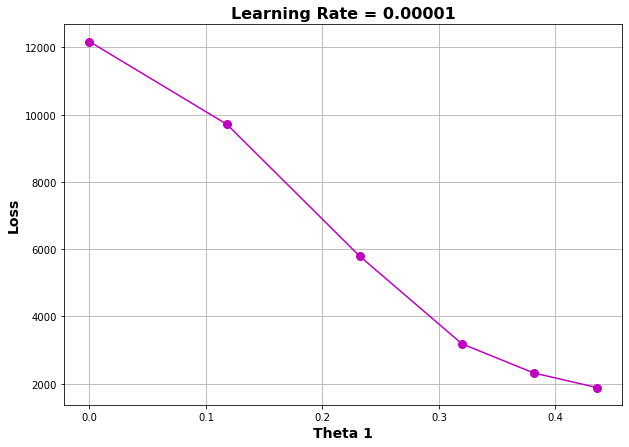

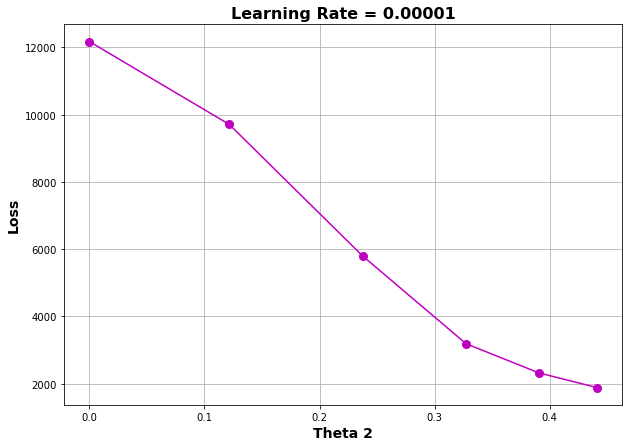

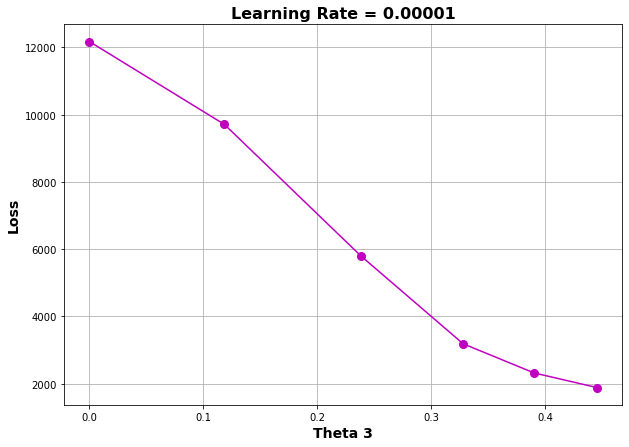

In [13]:
plot_loss_iter(loss,'Learning Rate = 0.00001')
ths_arr = np.array(thetas_all).reshape(len(thetas_all),4)
plot_theta_loss(ths_arr[:,0:1],'Theta 0',loss,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,1:2],'Theta 1',loss,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,2:3],'Theta 2',loss,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,3:4],'Theta 3',loss,'Learning Rate = 0.00001')

### Step 7: Make outer loop to perform as many epochs as you need to reach the stop conditions
### Remember the following:

##### Very Important notes:
- <font color='red'><b>Data should be shuffled for Mini-Batch GD to work fine.</b></font>
- <font color='red'><b>When you shuffle the data, input varibles and equivelant target label should be together. i.e. do not shuffle X and y separately or your data will be missed up.</b></font>
- <font color='red'><b>Save your losses and thetas for each iterations i.e. each mini-batch (not each epoch).</b></font>
- <font color='red'><b>Plot loss vs. iterations (not epochs). This will allow you to see the difference between mini-batch, SGD, and batch GD.</font>
- <font color='red'><b>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</b></font>

##### The following results uses the hyper-parameters alpha = 0.00001, max. epochs = 10000, gradient check=0.1, and cost convergence check=0.01

In [14]:
alpha=0.00001
max_epochs=10000
grad_check=0.1
conv_check=0.01


m = X.shape[0]

X_new = np.concatenate((np.ones((m,1)),X),axis=1)
n_1 = X_new.shape[1]

np.random.seed(101)
D = np.concatenate((X_new,y),axis=1)


np.random.shuffle(D)

X_sh = D[:,0:n_1]
y_sh = D[:,-1].reshape(-1,1)


thetas = np.zeros((n_1,1))

batch_size = 4
no_batches = m//batch_size

thetas_all = []
loss = []


for i in range(max_epochs):
    print(f'****************** Epoch {i} ********************\n')

    for batch in range(no_batches):
        thetas_all.append(thetas)

        start = batch * batch_size
        end = (batch + 1) * batch_size
        if batch+1 != no_batches:
            X_batch = X_sh[start:end]
            y_batch = y_sh[start:end]
        else:
            X_batch = X_sh[start:]
            y_batch = y_sh[start:]

        h= X_batch@thetas

        e = h-y_batch

        j=np.linalg.norm(e)**2/(2*len(h))
        loss.append(j)

        grad = X_batch.T@e/len(h)


        thetas =  thetas - alpha * grad      



    print(f'j = {j}\n')
    grad_norm = np.linalg.norm(grad)
    print(f'Gradient Vector:\n{grad}\n')
    print(f'Gradient Vector Norm:\n{grad_norm}\n')
    opt_thetas=thetas_all[-1]
    print(f'New Thetas : {opt_thetas}\n')

    if grad_norm <grad_check:
        print(f'****************** Training Report ********************\n')
        print(f'Gradient Descent converged after {i+1} epochs\n')
        print(f'Optimum Thetas : {opt_thetas}\n')
        print(f'Cost = {j}\n')
        break
    elif i>0 and np.absolute(loss[-1] - loss[-(no_batches+1)])<conv_check:
        print(f'****************** Training Report ********************\n')
        print(f'Gradient Descent converged after {i+1} epochs\n')
        print(f'Optimum Thetas : {opt_thetas}\n')
        print(f'Cost = {j}\n')
        break

****************** Epoch 0 ********************

j = 1883.7525786866875

Gradient Vector:
[[  -60.78220031]
 [-5058.34684832]
 [-5085.66878787]
 [-5368.91284939]]

Gradient Vector Norm:
8959.900642195886

New Thetas : [[0.00545451]
 [0.43544405]
 [0.4409459 ]
 [0.44537091]]

****************** Epoch 1 ********************

j = 171.23188556352972

Gradient Vector:
[[  -18.14941981]
 [-1514.94074129]
 [-1526.34988025]
 [-1610.96445522]]

Gradient Vector Norm:
2687.0662969069717

New Thetas : [[0.00752539]
 [0.60258285]
 [0.60974239]
 [0.61874659]]

****************** Epoch 2 ********************

j = 24.726198614719138

Gradient Vector:
[[  -6.58094332]
 [-553.4405051 ]
 [-560.53024829]
 [-591.24472689]]

Gradient Vector Norm:
984.9386721140321

New Thetas : [[0.00808697]
 [0.64776628]
 [0.65530752]
 [0.66617713]]

****************** Epoch 3 ********************

j = 8.396846516830298

Gradient Vector:
[[  -3.4409736 ]
 [-292.47457941]
 [-298.39050085]
 [-314.47351544]]

Gradient Vector 

In [15]:
from sklearn.metrics import r2_score

r squared: 0.9786614322106626


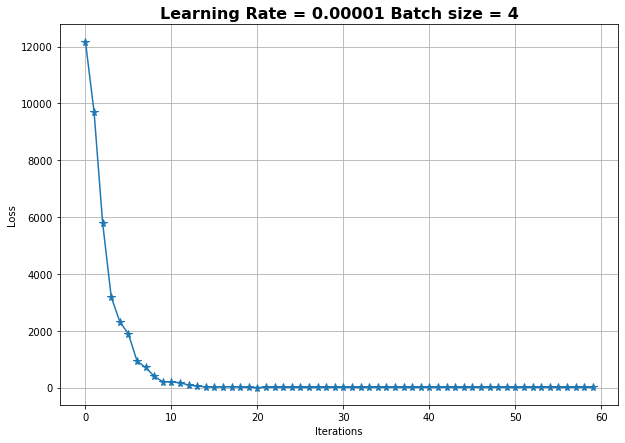

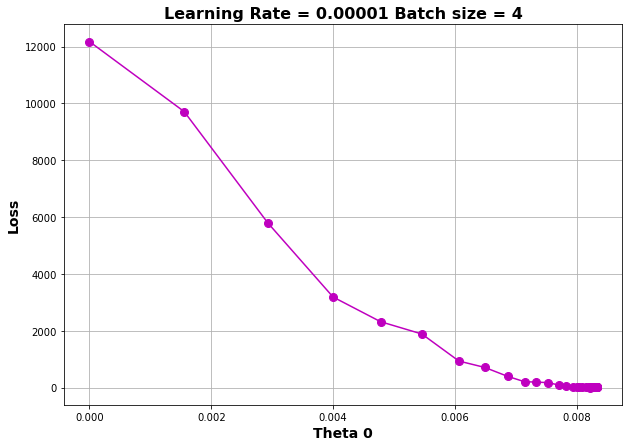

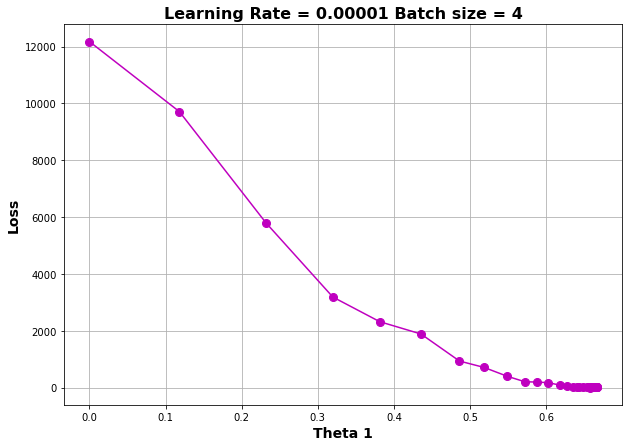

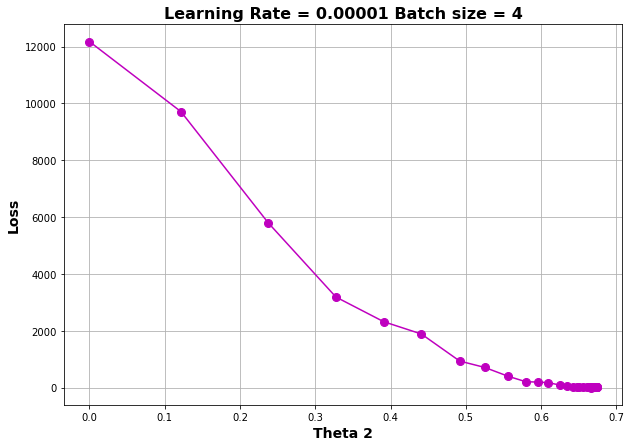

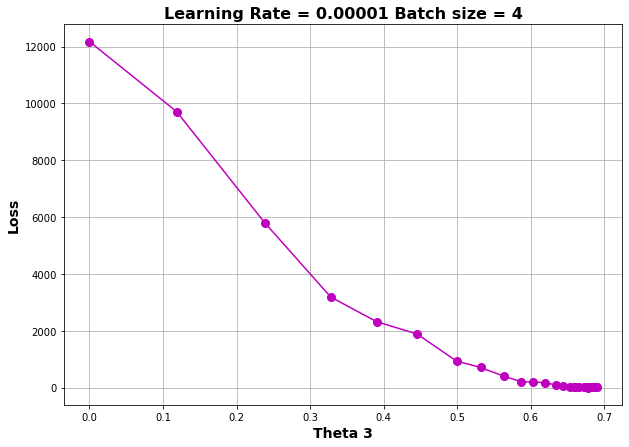

In [16]:
y_pred_GD_Multi = calc_best_fit(thetas_all[-1],X_new)
print(f'r squared: {r2_score(y,y_pred_GD_Multi)}')

plot_loss_iter(loss,'Learning Rate = 0.00001 Batch size = 4')
ths_arr = np.array(thetas_all).reshape(len(thetas_all),4)
plot_theta_loss(ths_arr[:,0:1],'Theta 0',loss,'Learning Rate = 0.00001 Batch size = 4')
plot_theta_loss(ths_arr[:,1:2],'Theta 1',loss,'Learning Rate = 0.00001 Batch size = 4')
plot_theta_loss(ths_arr[:,2:3],'Theta 2',loss,'Learning Rate = 0.00001 Batch size = 4')
plot_theta_loss(ths_arr[:,3:4],'Theta 3',loss,'Learning Rate = 0.00001 Batch size = 4')

### Make your implementation as a function

In [17]:
def MiniBatch_LR_MultiVar(X,y,batch_size,alpha=0.001,max_epochs=500,grad_check=0.001,conv_check=0.001):
    
    m = X.shape[0]

    X_new = np.concatenate((np.ones((m,1)),X),axis=1)
    n_1 = X_new.shape[1]

    np.random.seed(101)
    D = np.concatenate((X_new,y),axis=1)


    np.random.shuffle(D)

    X_sh = D[:,0:n_1]
    y_sh = D[:,-1].reshape(-1,1)


    thetas = np.zeros((n_1,1))

    no_batches = m//batch_size

    thetas_all = []
    loss = []


    for i in range(max_epochs):
        print(f'****************** Epoch {i} ********************\n')

        for batch in range(no_batches):
            thetas_all.append(thetas)

            start = batch * batch_size
            end = (batch + 1) * batch_size
            if batch+1 != no_batches:
                X_batch = X_sh[start:end]
                y_batch = y_sh[start:end]
            else:
                X_batch = X_sh[start:]
                y_batch = y_sh[start:]

            h= X_batch@thetas

            e = h-y_batch

            j=np.linalg.norm(e)**2/(2*len(h))
            loss.append(j)

            grad = X_batch.T@e/len(h)


            thetas =  thetas - alpha * grad      



        print(f'j = {j}\n')
        grad_norm = np.linalg.norm(grad)
        print(f'Gradient Vector:\n{grad}\n')
        print(f'Gradient Vector Norm:\n{grad_norm}\n')
        opt_thetas=thetas_all[-1]
        print(f'New Thetas : {opt_thetas}\n')

        if grad_norm <grad_check:
            print(f'****************** Training Report ********************\n')
            print(f'Gradient Descent converged after {i+1} epochs\n')
            print(f'Optimum Thetas : {opt_thetas}\n')
            print(f'Cost = {j}\n')
            break
        elif i>0 and np.absolute(loss[-1] - loss[-(no_batches+1)])<conv_check:
            print(f'****************** Training Report ********************\n')
            print(f'Gradient Descent converged after {i+1} epochs\n')
            print(f'Optimum Thetas : {opt_thetas}\n')
            print(f'Cost = {j}\n')
            break
        
    y_best_fit = X_new@thetas_all[-1]
    return loss, thetas_all, y_best_fit

In [18]:
loss, thetas_all,y_pred = MiniBatch_LR_MultiVar(X,y,4,0.00001,10000,0.1,0.01)

****************** Epoch 0 ********************

j = 1883.7525786866875

Gradient Vector:
[[  -60.78220031]
 [-5058.34684832]
 [-5085.66878787]
 [-5368.91284939]]

Gradient Vector Norm:
8959.900642195886

New Thetas : [[0.00545451]
 [0.43544405]
 [0.4409459 ]
 [0.44537091]]

****************** Epoch 1 ********************

j = 171.23188556352972

Gradient Vector:
[[  -18.14941981]
 [-1514.94074129]
 [-1526.34988025]
 [-1610.96445522]]

Gradient Vector Norm:
2687.0662969069717

New Thetas : [[0.00752539]
 [0.60258285]
 [0.60974239]
 [0.61874659]]

****************** Epoch 2 ********************

j = 24.726198614719138

Gradient Vector:
[[  -6.58094332]
 [-553.4405051 ]
 [-560.53024829]
 [-591.24472689]]

Gradient Vector Norm:
984.9386721140321

New Thetas : [[0.00808697]
 [0.64776628]
 [0.65530752]
 [0.66617713]]

****************** Epoch 3 ********************

j = 8.396846516830298

Gradient Vector:
[[  -3.4409736 ]
 [-292.47457941]
 [-298.39050085]
 [-314.47351544]]

Gradient Vector 

r squared: 0.9786614322106626


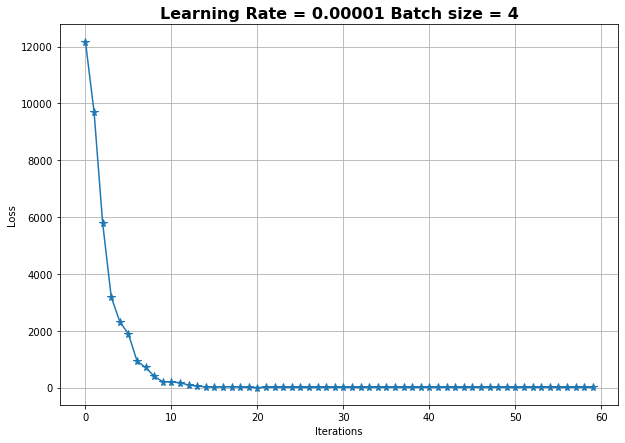

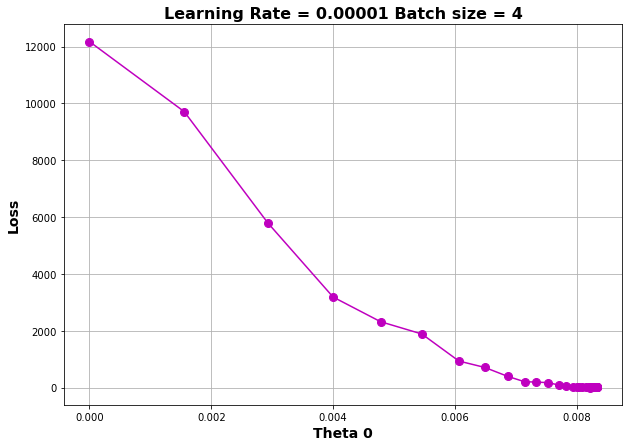

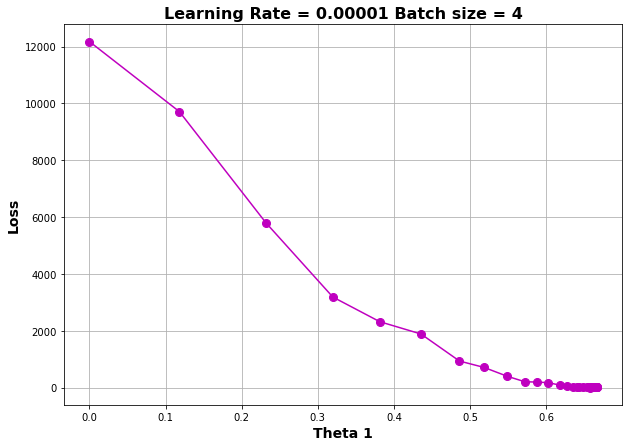

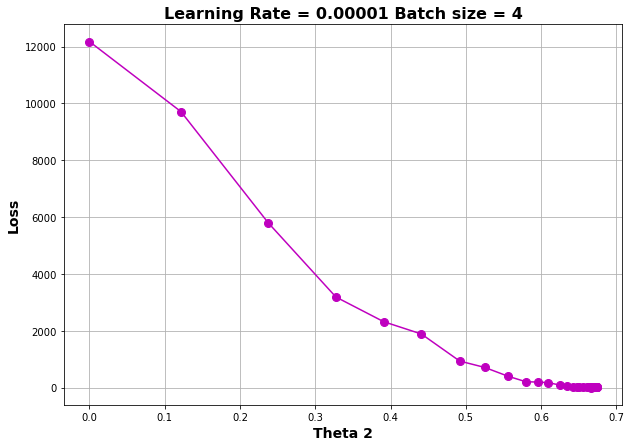

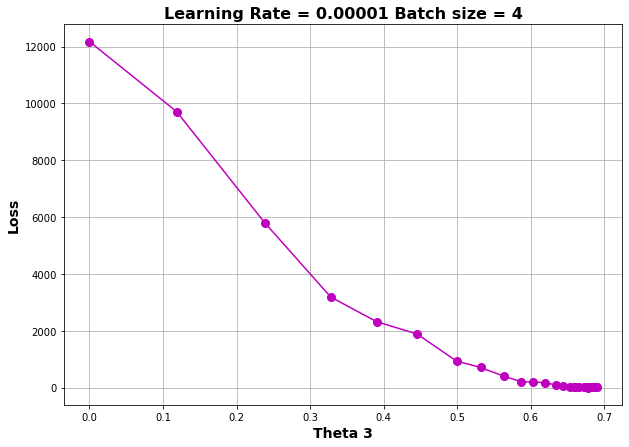

In [19]:
print(f'r squared: {r2_score(y,y_pred)}')

plot_loss_iter(loss,'Learning Rate = 0.00001 Batch size = 4')
ths_arr = np.array(thetas_all).reshape(len(thetas_all),4)
plot_theta_loss(ths_arr[:,0:1],'Theta 0',loss,'Learning Rate = 0.00001 Batch size = 4')
plot_theta_loss(ths_arr[:,1:2],'Theta 1',loss,'Learning Rate = 0.00001 Batch size = 4')
plot_theta_loss(ths_arr[:,2:3],'Theta 2',loss,'Learning Rate = 0.00001 Batch size = 4')
plot_theta_loss(ths_arr[:,3:4],'Theta 3',loss,'Learning Rate = 0.00001 Batch size = 4')

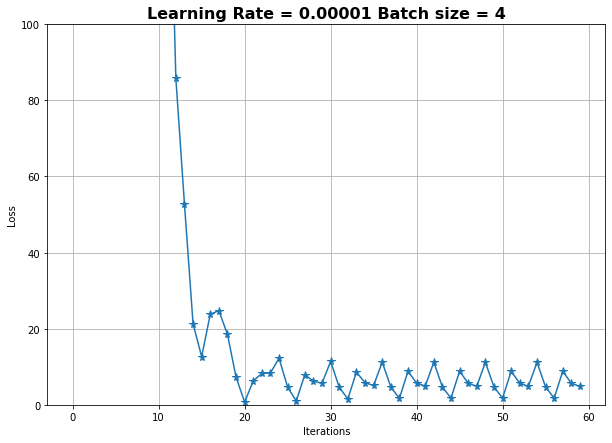

In [20]:
plt.figure(figsize=(10,7))
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(loss,'-*',markersize=8)
plt.title('Learning Rate = 0.00001 Batch size = 4',fontsize=16,fontweight='bold')
plt.ylim((0,100))
plt.show()

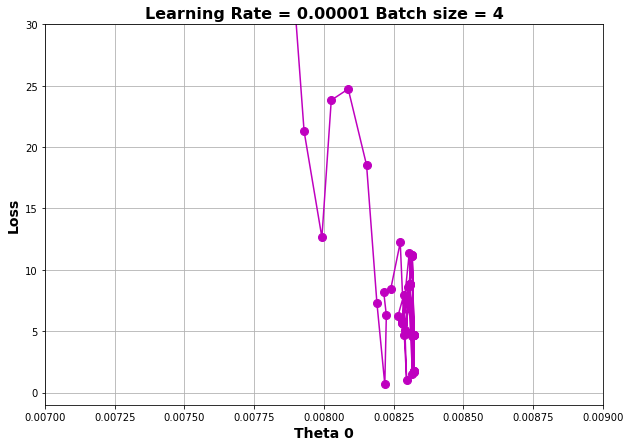

In [21]:
plt.figure(figsize=(10,7))
plt.grid()
plt.xlabel('Theta 0',fontsize=14,fontweight='bold')
plt.ylabel('Loss',fontsize=14,fontweight='bold')
plt.plot(ths_arr[:,0:1],loss,'-mo',markersize=8)
plt.title('Learning Rate = 0.00001 Batch size = 4',fontsize=16,fontweight='bold')
plt.ylim((-1,30))
plt.xlim((0.007,.009))
plt.show()

### Try mini-batch size = 1 and mini-batch size = m (25) and observe the results very carefully.

### Mini-batch size = 1

In [22]:
loss, thetas_all, y_pred = MiniBatch_LR_MultiVar(X,y,1,0.00001,10000,0.1,0.01)

****************** Epoch 0 ********************

j = 0.24204037135034231

Gradient Vector:
[[ 0.69575911]
 [48.70313788]
 [45.22434232]
 [51.48617433]]

Gradient Vector Norm:
84.07465138146812

New Thetas : [[0.00858371]
 [0.66962122]
 [0.6807672 ]
 [0.68329489]]

****************** Epoch 1 ********************

j = 0.9472218676718938

Gradient Vector:
[[  1.37638793]
 [ 96.34715514]
 [ 89.46521549]
 [101.85270686]]

Gradient Vector Norm:
166.32097709997373

New Thetas : [[0.00862376]
 [0.67185715]
 [0.68264611]
 [0.68872658]]

****************** Epoch 2 ********************

j = 0.961873755509241

Gradient Vector:
[[  1.38699225]
 [ 97.08945774]
 [ 90.15449647]
 [102.63742675]]

Gradient Vector Norm:
167.60239006616783

New Thetas : [[0.00862234]
 [0.67091965]
 [0.68134392]
 [0.69090053]]

****************** Epoch 3 ********************

j = 0.9727691998645135

Gradient Vector:
[[  1.39482558]
 [ 97.63779063]
 [ 90.66366273]
 [103.21709295]]

Gradient Vector Norm:
168.54895939412754



r squared: 0.9789233548252715


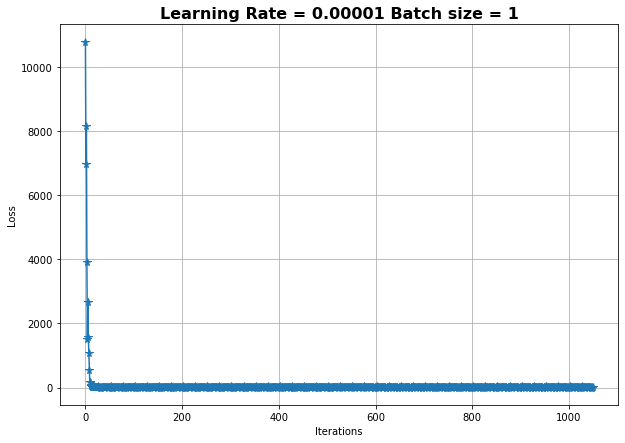

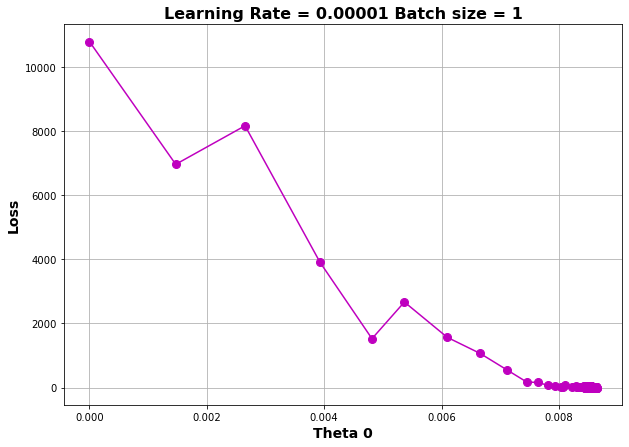

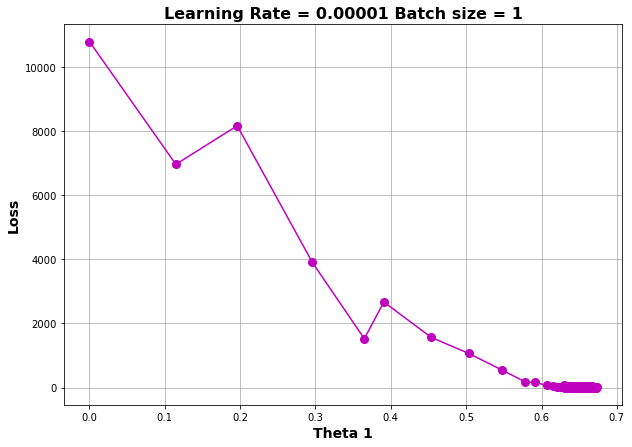

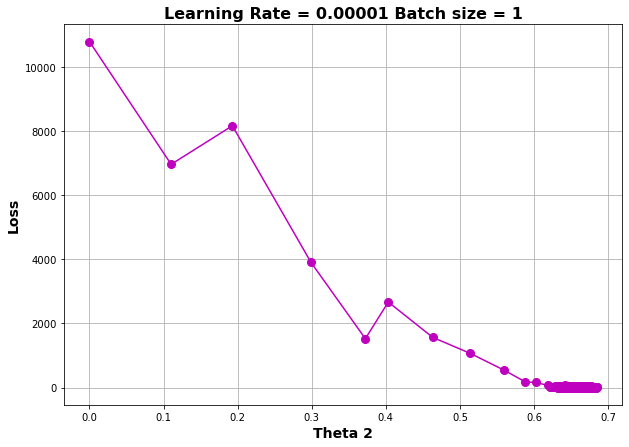

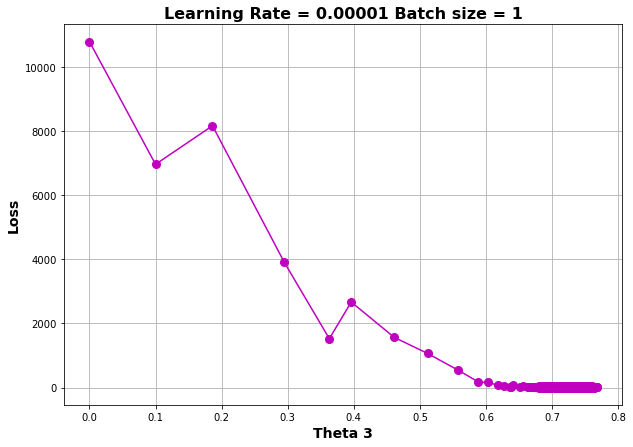

In [23]:
print(f'r squared: {r2_score(y,y_pred)}')

plot_loss_iter(loss,'Learning Rate = 0.00001 Batch size = 1')
ths_arr = np.array(thetas_all).reshape(len(thetas_all),4)
plot_theta_loss(ths_arr[:,0:1],'Theta 0',loss,'Learning Rate = 0.00001 Batch size = 1')
plot_theta_loss(ths_arr[:,1:2],'Theta 1',loss,'Learning Rate = 0.00001 Batch size = 1')
plot_theta_loss(ths_arr[:,2:3],'Theta 2',loss,'Learning Rate = 0.00001 Batch size = 1')
plot_theta_loss(ths_arr[:,3:4],'Theta 3',loss,'Learning Rate = 0.00001 Batch size = 1')

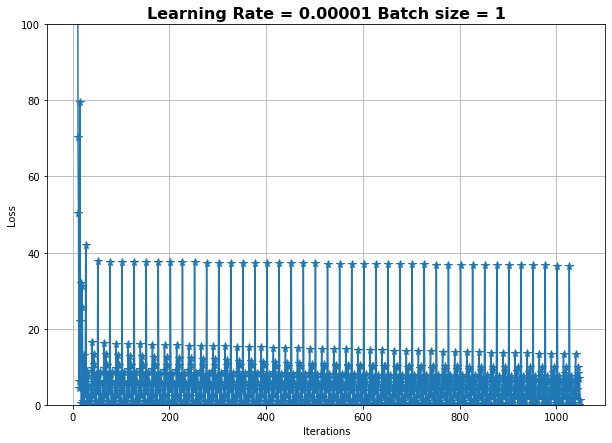

In [24]:
plt.figure(figsize=(10,7))
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(loss,'-*',markersize=8)
plt.title('Learning Rate = 0.00001 Batch size = 1',fontsize=16,fontweight='bold')
plt.ylim((0,100))
plt.show()

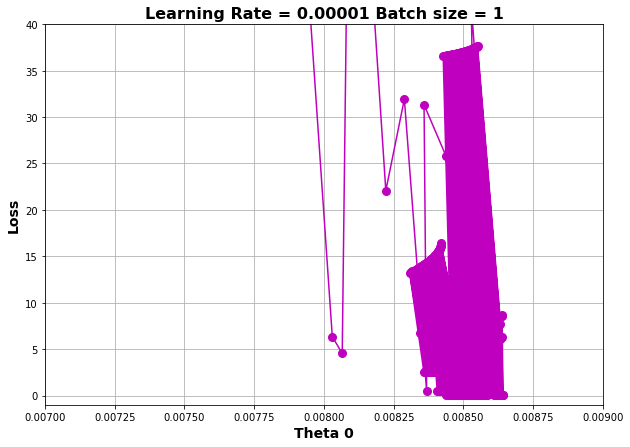

In [25]:
plt.figure(figsize=(10,7))
plt.grid()
plt.xlabel('Theta 0',fontsize=14,fontweight='bold')
plt.ylabel('Loss',fontsize=14,fontweight='bold')
plt.plot(ths_arr[:,0:1],loss,'-mo',markersize=8)
plt.title('Learning Rate = 0.00001 Batch size = 1',fontsize=16,fontweight='bold')
plt.ylim((-1,40))
plt.xlim((0.007,.009))
plt.show()

### Mini-batch size = m (25)

In [26]:
loss, thetas_all,y_pred = MiniBatch_LR_MultiVar(X,y,m,0.00001,10000,0.1,0.01)

****************** Epoch 0 ********************

j = 13405.98

Gradient Vector:
[[  -162.04]
 [-13075.8 ]
 [-13147.2 ]
 [-13467.08]]

Gradient Vector Norm:
22917.545989219703

New Thetas : [[0.]
 [0.]
 [0.]
 [0.]]

****************** Epoch 1 ********************

j = 8668.481648916413

Gradient Vector:
[[  -130.28089594]
 [-10512.48957462]
 [-10569.78406976]
 [-10829.54649638]]

Gradient Vector Norm:
18426.30789841306

New Thetas : [[0.0016204]
 [0.130758 ]
 [0.131472 ]
 [0.1346708]]

****************** Epoch 2 ********************

j = 5605.887123892012

Gradient Vector:
[[ -104.7457425 ]
 [-8451.52100482]
 [-8497.47443694]
 [-8708.90018436]]

Gradient Vector Norm:
14815.235171712453

New Thetas : [[0.00292321]
 [0.2358829 ]
 [0.23716984]
 [0.24296626]]

****************** Epoch 3 ********************

j = 3626.04772762138

Gradient Vector:
[[  -84.21480829]
 [-6794.4484357 ]
 [-6831.28348838]
 [-7003.844704  ]]

Gradient Vector Norm:
11911.838498552845

New Thetas : [[0.00397067]
 [0

r squared: 0.9788982282256367


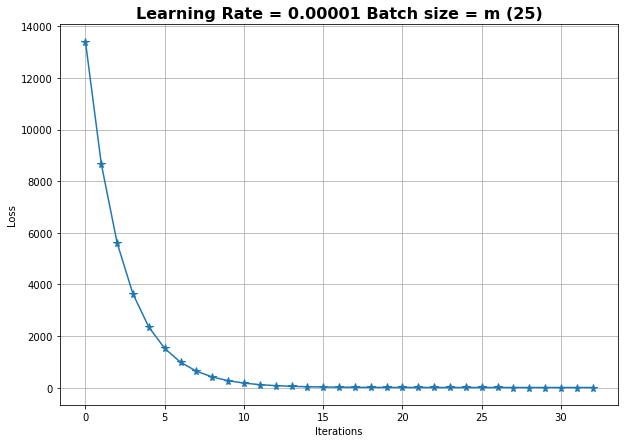

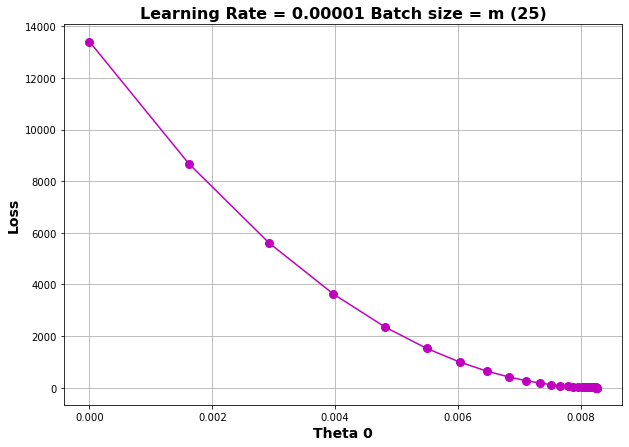

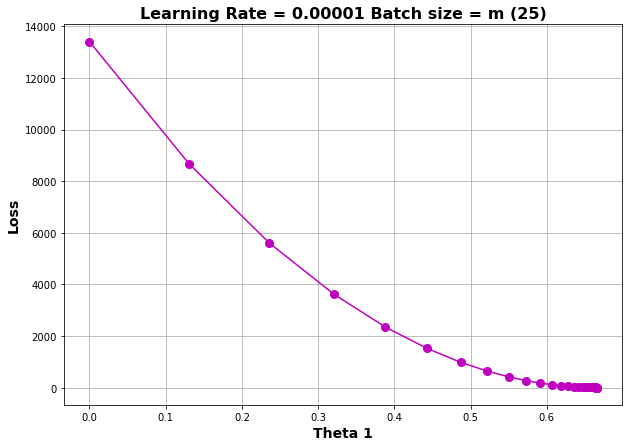

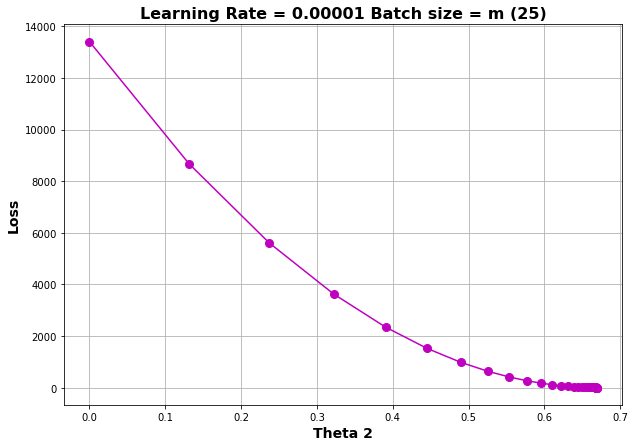

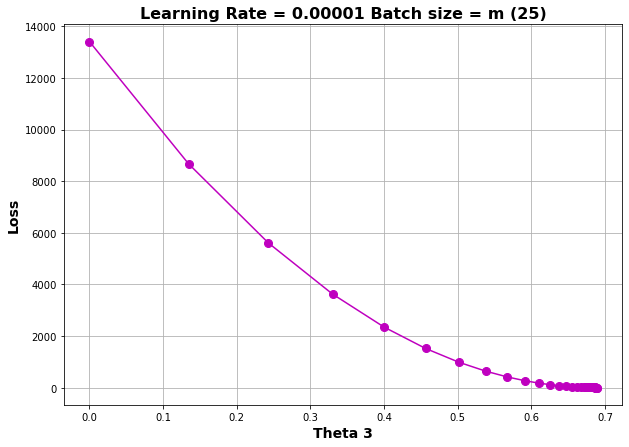

In [27]:
print(f'r squared: {r2_score(y,y_pred)}')

plot_loss_iter(loss,'Learning Rate = 0.00001 Batch size = m (25)')
ths_arr = np.array(thetas_all).reshape(len(thetas_all),4)
plot_theta_loss(ths_arr[:,0:1],'Theta 0',loss,'Learning Rate = 0.00001 Batch size = m (25)')
plot_theta_loss(ths_arr[:,1:2],'Theta 1',loss,'Learning Rate = 0.00001 Batch size = m (25)')
plot_theta_loss(ths_arr[:,2:3],'Theta 2',loss,'Learning Rate = 0.00001 Batch size = m (25)')
plot_theta_loss(ths_arr[:,3:4],'Theta 3',loss,'Learning Rate = 0.00001 Batch size = m (25)')

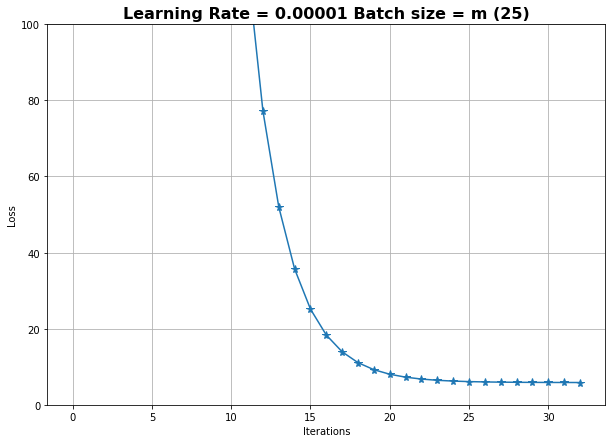

In [28]:
plt.figure(figsize=(10,7))
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.plot(loss,'-*',markersize=8)
plt.title('Learning Rate = 0.00001 Batch size = m (25)',fontsize=16,fontweight='bold')
plt.ylim((0,100))
plt.show()

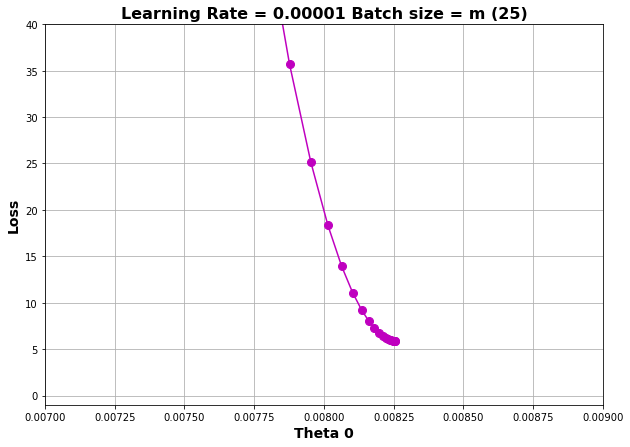

In [29]:
plt.figure(figsize=(10,7))
plt.grid()
plt.xlabel('Theta 0',fontsize=14,fontweight='bold')
plt.ylabel('Loss',fontsize=14,fontweight='bold')
plt.plot(ths_arr[:,0:1],loss,'-mo',markersize=8)
plt.title('Learning Rate = 0.00001 Batch size = m (25)',fontsize=16,fontweight='bold')
plt.ylim((-1,40))
plt.xlim((0.007,.009))
plt.show()

## Single Variable Linear Regression:

### Data Generation
- To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b>.
- The values in <b>X</b> are <b>50 data points</b> equally distributed between <b>0</b> and <b>20</b>.
- You should use <b>np.linspace(0,20)</b> to generate X data points. 
- The values in <b>y</b> will be generated by the equation:
$\mathbf{y_i = a*x_i + b ; a = -2, b = 1}$.
- Reshape both X and y to be column vectors.

## Single Variable 

In [30]:
def generate_Xy():
    X = np.linspace(0,20)
    a=-2
    b=1
    y=a*X+b
    m = X.shape[0]
    X = X.reshape(-1,1)
    y = y.reshape(-1,1)
    return X,y
X,y = generate_Xy()

In [31]:
print(f'X:\n {X}')
print(f'y:\n {y}')

X:
 [[ 0.        ]
 [ 0.40816327]
 [ 0.81632653]
 [ 1.2244898 ]
 [ 1.63265306]
 [ 2.04081633]
 [ 2.44897959]
 [ 2.85714286]
 [ 3.26530612]
 [ 3.67346939]
 [ 4.08163265]
 [ 4.48979592]
 [ 4.89795918]
 [ 5.30612245]
 [ 5.71428571]
 [ 6.12244898]
 [ 6.53061224]
 [ 6.93877551]
 [ 7.34693878]
 [ 7.75510204]
 [ 8.16326531]
 [ 8.57142857]
 [ 8.97959184]
 [ 9.3877551 ]
 [ 9.79591837]
 [10.20408163]
 [10.6122449 ]
 [11.02040816]
 [11.42857143]
 [11.83673469]
 [12.24489796]
 [12.65306122]
 [13.06122449]
 [13.46938776]
 [13.87755102]
 [14.28571429]
 [14.69387755]
 [15.10204082]
 [15.51020408]
 [15.91836735]
 [16.32653061]
 [16.73469388]
 [17.14285714]
 [17.55102041]
 [17.95918367]
 [18.36734694]
 [18.7755102 ]
 [19.18367347]
 [19.59183673]
 [20.        ]]
y:
 [[  1.        ]
 [  0.18367347]
 [ -0.63265306]
 [ -1.44897959]
 [ -2.26530612]
 [ -3.08163265]
 [ -3.89795918]
 [ -4.71428571]
 [ -5.53061224]
 [ -6.34693878]
 [ -7.16326531]
 [ -7.97959184]
 [ -8.79591837]
 [ -9.6122449 ]
 [-10.42857143]
 

### Plot the data (scatter plot of X,y)

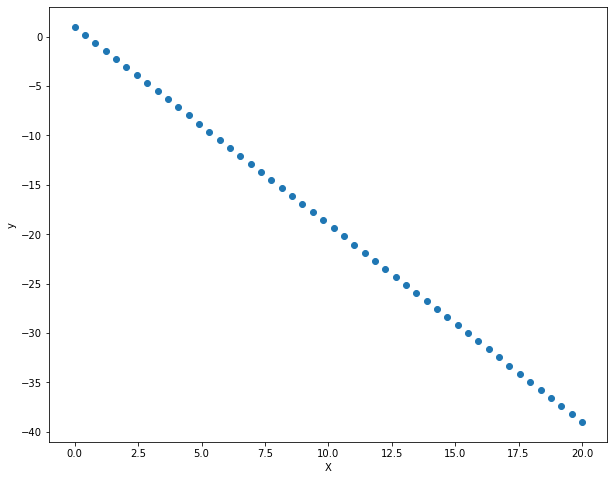

In [32]:
plt.figure(figsize =(10,8))
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### Use the Mini-Batch GD Multivariable LR function for this data

##### The following results uses the hyper-parameters alpha = 0.001, max. epochs = 500, 0.001 for both stop conditions, and batch size = 8.

In [33]:
loss, thetas_all,y_pred = MiniBatch_LR_MultiVar(X,y,8,0.001,500,0.001,0.001)

****************** Epoch 0 ********************

j = 38.97476527231926

Gradient Vector:
[[ 6.84332775]
 [88.82808627]]

Gradient Vector Norm:
89.0913017370593

New Thetas : [[-0.07408208]
 [-1.03972009]]

****************** Epoch 1 ********************

j = 6.578969204430637

Gradient Vector:
[[ 2.55039507]
 [36.01193949]]

Gradient Vector Norm:
36.102137069597916

New Thetas : [[-0.11058282]
 [-1.5559705 ]]

****************** Epoch 2 ********************

j = 1.2187432453027043

Gradient Vector:
[[ 0.78820233]
 [14.32745168]]

Gradient Vector Norm:
14.349116156964381

New Thetas : [[-0.12455194]
 [-1.76800753]]

****************** Epoch 3 ********************

j = 0.3561825925516322

Gradient Vector:
[[0.06507692]
 [5.42495902]]

Gradient Vector Norm:
5.425349334106802

New Thetas : [[-0.12927161]
 [-1.8551409 ]]

****************** Epoch 4 ********************

j = 0.22727945329576044

Gradient Vector:
[[-0.23143018]
 [ 1.77048033]]

Gradient Vector Norm:
1.7855420791073728

New Th

r squared: 0.9976192372592104


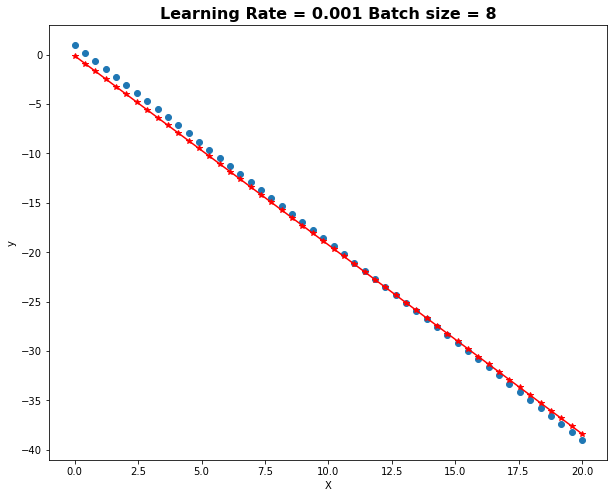

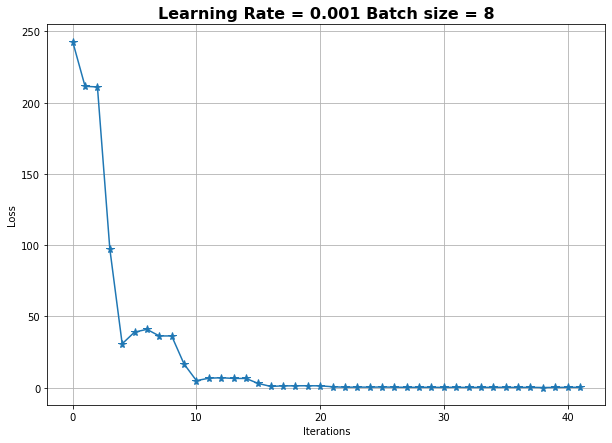

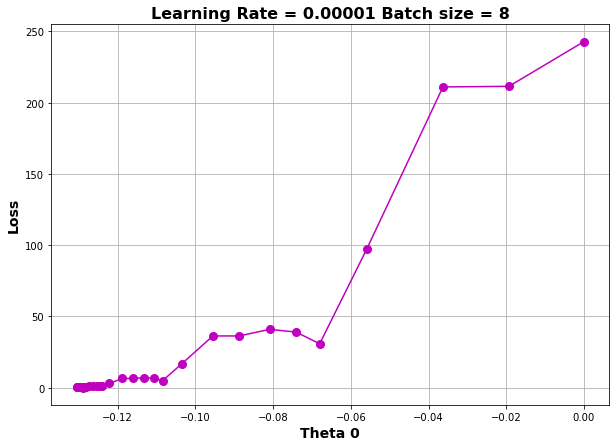

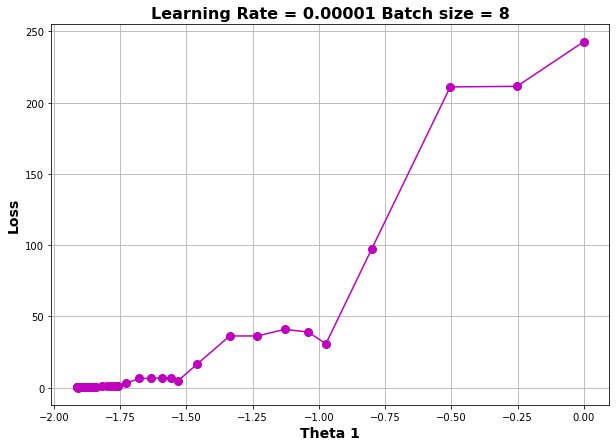

In [34]:
print(f'r squared: {r2_score(y,y_pred)}')

plotReg(X,y,y_pred,'Learning Rate = 0.001 Batch size = 8')
plot_loss_iter(loss,'Learning Rate = 0.001 Batch size = 8')
ths_arr = np.array(thetas_all).reshape(len(thetas_all),2)
plot_theta_loss(ths_arr[:,0:1],'Theta 0',loss,'Learning Rate = 0.00001 Batch size = 8')
plot_theta_loss(ths_arr[:,1:2],'Theta 1',loss,'Learning Rate = 0.00001 Batch size = 8')